In [1]:
import json
import requests
import pandas as pd
import folium 


In [221]:
giro="diseño"
long=19.421336 
lat=-99.162700
mts=1000

In [180]:
response = requests.get("https://www.inegi.org.mx/app/api/denue/v1/consulta/Buscar/{}/{},{}/{}/44522d01-cae7-455b-9b53-7fc7d481cecb".format(giro,long,lat,mts))
results = response.json()

data = pd.DataFrame(response.json())
print(len(data))
data.head()


125


,CP,Calle,CentroComercial,Clase_actividad,Colonia,Correo_e,Estrato,Id,Latitud,Longitud,...,NumLocal,Num_Exterior,Num_Interior,Razon_social,Sitio_internet,Telefono,Tipo,TipoCentroComercial,Tipo_vialidad,Ubicacion
0,06700,TONALA,,Servicios de diseño de sistemas de cómputo y s...,ROMA NORTE,MVAZQEZ@REALNET.COM.MX,11 a 30 personas,1028239,19.42140394,-99.16340624,...,,6,202,REALNET SA DE CV,WWW.REALNETSA.COM.MX,,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
1,06700,DURANGO,,Comercio al por menor de muebles para el hogar,ROMA NORTE,,6 a 10 personas,8326496,19.42042099,-99.16376558,...,,153,,DISEÑO SILLIOTI SA DE CV,ILMIOMUEBLE.COM,,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
2,06700,JALAPA,,Servicios de diseño de sistemas de cómputo y s...,ROMA NORTE,INFO@BEEPQUEST.COM,6 a 10 personas,6810967,19.42265117,-99.16231136,...,,17,503,APPQUEST SAPI DE CV,WWW.BEEPQUEST.COM,553382070,Fijo,,CALLE,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
3,06700,INSURGENTES SUR,,Comercio al por menor de muebles para el hogar,ROMA NORTE,,0 a 5 personas,1029567,19.42002628,-99.16392516,...,,214,0,COLECCION DISEÑO SA DE CV,,,Fijo,,AVENIDA,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"
4,06700,INSURGENTES SUR,,Comercio al por menor de motocicletas,DURANGO,,0 a 5 personas,8327269,19.42017555,-99.16408991,...,,207,,DISEÑOS Y CLASICOS MEXICO SA DE CV,,,Fijo,,AVENIDA,"CUAUHTÉMOC, Cuauhtémoc, CIUDAD DE MÉXICO"


In [136]:
sss=data.Clase_actividad.value_counts()[:5]
sss.index[0]

'Servicios de diseño de sistemas de cómputo y servicios relacionados'

In [4]:
info = pd.read_csv('../info.csv')
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466301 entries, 0 to 466300
Data columns (total 16 columns):
Unnamed: 0    466301 non-null int64
id            466301 non-null int64
nom_estab     466301 non-null object
codigo_act    466301 non-null int64
nombre_act    466301 non-null object
tipoCenCom    88178 non-null object
per_ocu       466301 non-null object
tipoUniEco    466301 non-null object
ageb          466285 non-null object
manzana       466285 non-null float64
latitud       466301 non-null float64
longitud      466301 non-null float64
fecha_alta    466301 non-null object
www           37279 non-null object
Año           466301 non-null int64
Mes           466301 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 56.9+ MB


In [5]:


#for e in info.select_dtypes('object').columns:
 #   info[e]=info[e].astype('category')
for e in info.select_dtypes('integer').columns:
    info[e]=pd.to_numeric(info[e], downcast='integer')
for e in info.select_dtypes('float').columns:
    info[e]=pd.to_numeric(info[e], downcast='float')  
    
info["fecha_alta"]=pd.to_datetime(info.fecha_alta)




In [6]:
empresas=data.Id
len(empresas)
d=info[info["id"].isin(empresas)]
d.reset_index(drop=True,inplace=True)
d.info()
d["manzana"]=d.manzana.astype(int)
d["clave"]=d["ageb"].astype(str) + "-" + d["manzana"].astype(str)
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 16 columns):
Unnamed: 0    125 non-null int32
id            125 non-null int32
nom_estab     125 non-null object
codigo_act    125 non-null int32
nombre_act    125 non-null object
tipoCenCom    24 non-null object
per_ocu       125 non-null object
tipoUniEco    125 non-null object
ageb          125 non-null object
manzana       125 non-null float32
latitud       125 non-null float32
longitud      125 non-null float32
fecha_alta    125 non-null datetime64[ns]
www           75 non-null object
Año           125 non-null int16
Mes           125 non-null int8
dtypes: datetime64[ns](1), float32(3), int16(1), int32(3), int8(1), object(7)
memory usage: 11.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Unnamed: 0,id,nom_estab,codigo_act,nombre_act,tipoCenCom,per_ocu,tipoUniEco,ageb,manzana,latitud,longitud,fecha_alta,www,Año,Mes,clave
0,1054,8286189,CONSTRUCTORA Y REMODELADORA DE OFICINAS,236221,Edificación de inmuebles comerciales y de serv...,NaN,11 a 30 personas,Fijo,1110,2,19.416512,-99.155670,2019-11-01,NaN,2019,11,1110-2
1,1272,957422,"EDISA EDIFICACIÓN Y DISENOS, SA DE CV",236221,Edificación de inmuebles comerciales y de serv...,NaN,51 a 100 personas,Fijo,120A,2,19.414587,-99.165863,2010-07-01,NaN,2010,7,120A-2
2,4308,1029505,DISEÑADOR PEDRO LOREDO ALTA COSTURA,315225,Confección de prendas de vestir sobre medida,NaN,0 a 5 personas,Fijo,1093,14,19.418684,-99.169586,2010-07-01,NaN,2010,7,1093-14
3,4317,1029455,DISEÑO DE MODAS ALEJANDRO PONCE,315225,Confección de prendas de vestir sobre medida,NaN,0 a 5 personas,Fijo,1093,13,19.418406,-99.169518,2010-07-01,WWW.ALEJANDROPONCE.COM.MX,2010,7,1093-13
4,29927,1029675,DISEÑO E INTERIORISMO JAMES & STEVEN,337210,Fabricación de muebles de oficina y estantería,NaN,0 a 5 personas,Fijo,1002,18,19.419149,-99.159454,2010-07-01,WWW.JAMESANDSTEVEN.COM,2010,7,1002-18


In [252]:
llat=list(d.latitud)
llong=list(d.longitud)
name=list(d.nom_estab)

mapa=folium.Map(location=[long, lat], tiles='openstreetmap', zoom_start=15,)

for i in range(len(d)):
    folium.Marker([llat[i], llong[i]], icon=folium.Icon(color='red'),popup=name[i]).add_to(mapa)

    
display(mapa)

mapa.save("../mapas/mapa {}.html".format(giro))

In [9]:
d.fecha_alta.value_counts()

2019-11-01    56
2010-07-01    30
2014-12-01    14
2019-04-01     9
2016-10-01     5
2017-11-01     4
2011-03-01     3
2012-06-01     3
2016-01-01     1
Name: fecha_alta, dtype: int64

In [ ]:
'''
dat=pd.DataFrame(d.fecha_alta.value_counts())
dat=dat.sort_index()
dat.index = pd.DatetimeIndex(dat.index).to_period('M')
train=dat[1:-1]
modelo=AR(train).fit()
pred=modelo.predict(8,10)
print(pred)
train
'''

In [ ]:
'''
from sklearn.linear_model import LinearRegression


train=gk[1:-1]
train=train.reset_index(drop=False)
train=train.sort_values(by=['index'])
X=train["index"]
y=train.Año
z="2019"
X.reshape(1, -1)
linreg=LinearRegression(fit_intercept=True)
linreg.fit(X, y)
#y_pred=linreg.predict(X_test)
'''

In [80]:
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
import matplotlib.pyplot as plt
cf.go_offline()
import seaborn as sns

In [11]:
display(len(d))
gk =pd.DataFrame(d.Año.value_counts())
gk=gk.reset_index(drop=False)
gk=gk.sort_values(by=['index'])
print(gk)
gm =pd.DataFrame(d.Mes.value_counts())
gm=gm.reset_index(drop=False)
gm=gm.sort_values(by=['index'])
gm

125

   index  Año
1   2010   30
6   2011    3
5   2012    3
2   2014   14
3   2016    6
4   2017    4
0   2019   65


,index,Mes
7,1,1
6,3,3
3,4,9
5,6,3
1,7,30
4,10,5
0,11,60
2,12,14


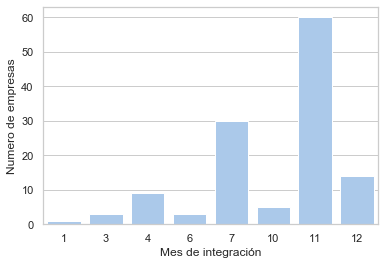

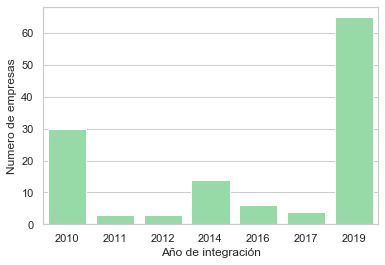

In [188]:
gm.iplot(x='index', y='Mes',kind='bar', xTitle='Mes',yTitle='N. Empresas', title='Mes de integración')
gk.iplot(x='index', y='Año',kind='bar', xTitle='Año',yTitle='N. Empresas', title='Año de integracion....')
ax = sns.barplot(x = 'index', y = 'Mes', data = gm, color = 'b')
ax.set(xlabel='Mes de integración', ylabel='Numero de empresas')
ax.figure.savefig('../images/Mes {}.png'.format(giro))
plt.show()
a2 = sns.barplot(x = 'index', y = 'Año', data = gk, color = 'g')
a2.set(xlabel='Año de integración', ylabel='Numero de empresas')
a2.figure.savefig('../images/Año {}.png'.format(giro))
plt.show()



In [ ]:
mask=(gk["index"] > 2011) & (gk["index"] < 2019)
gk.loc[mask]


In [ ]:
#Indice nacional de precios al consumidor

In [14]:
poblaT = pd.read_csv('../pobclave.csv')
poblaT.head()

,Unnamed: 0,AGEB,MZA,POBTOT,POBMAS,POBFEM,PEA,PEA_M,PEA_F,PE_INAC,PE_INAC_M,PE_INAC_F,clave
0,0,0000,0,8851080,4233783,4617297,4035075,2389679,1645396,3017165,920594,2096571,0000-0
1,1,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
2,2,0000,0,414711,196053,218658,187402,108940,78462,151520,48844,102676,0000-0
3,3,0010,0,3424,1600,1824,1398,789,609,1511,552,959,0010-0
4,4,0010,1,202,96,106,75,47,28,97,37,60,0010-1


In [294]:

Evida = pd.read_csv('../Evida.csv')
Evida

,Unnamed: 0,Proba de sobrevivir,Unnamed: 3,Espe. Vida,Age
0,2,0.672031,0.327969,7.435258,0
1,3,0.491375,0.508625,7.790058,1
2,4,0.429555,0.570445,8.163900,2
3,5,0.385694,0.614306,8.557950,3
4,6,0.351672,0.648328,8.972207,4
5,7,0.323874,0.676126,9.396568,5


In [34]:
p=d.clave
len(p)
dx=poblaT[poblaT["clave"].isin(p)]
print(len(dx))

dx["POBMAS"]=dx.POBMAS.str.replace('*' , '0').astype(int)
dx["POBFEM"]=dx.POBFEM.str.replace('*' , '0').astype(int)
dx["PEA"]=dx.PEA.str.replace('*' , '0').astype(int)
dx["PEA_M"]=dx.PEA_M.str.replace('*' , '0').astype(int)
dx["PEA_F"]=dx.PEA_F.str.replace('*' , '0').astype(int)
print(dx.POBTOT.sum())
print(dx.POBMAS.sum())
print(dx.POBFEM.sum())
print(dx.PEA.sum())
print(dx.PEA_M.sum())
print(dx.PEA_F.sum())

86
9794
4839
4951
5695
3177
2513


In [315]:
from fpdf import FPDF
 
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Analisis de Supervivencia de Pymes en CDMX", ln=4, align="C")
pdf.cell(90, 10, " ", 0, 2, 'C')   
pdf.multi_cell(0,8,"La palabra de búsqueda es: --{}--, con longitud {} y latitud {}\nEsta búsqueda extrae toda la competencia tanto indirecta como directa en \
un rango de {} mts.\nEn total son {} empresas, con {} clases de actividades diferentes, de las cuales destacan ".format(giro,long,lat,mts,len(data),len(data.Clase_actividad.unique())) ,0,10)
pdf.cell(90, 3, " ", 0, 2, 'C')
pdf.multi_cell(0,10,"1. {} : {} \n2. {} : {} \n3. {} : {} \n4. {} : {} \n5. {} : {}".format(sss.index[0],sss[0],sss.index[1],sss[1],sss.index[2],sss[2],sss.index[3],sss[3],sss.index[4],sss[4]) ,1,10)
pdf.cell(90, 5, " ", 0, 2, 'C')
pdf.set_font("Arial", size=10)
pdf.cell(200, 10, txt="Da click en botón rojo para ver mapa inteactivo", ln=4, align="C")
pdf.multi_cell(0,6,"TABLAS DE INCORPORACIóN A DENUE *INEGI*\n *Por el momento solo contamos con info de Denue, el cual no muestra la fecha de fundación de las empresas esta se utilizaria para ver la demanda del \
servicio/producto asi como hacer modelos que predigan la creación de nuevas empresas en el sector",0,3)
pdf.image('../images/Año {}.png'.format(giro), x=8, y=153, w=105, h=70)
pdf.image('../images/Mes {}.png'.format(giro), x=110, y=153, w=105, h=70)
pdf.image('../images/red.png'.format(giro), x=55, y=113, w=15, h=9, link = "../mapas/mapa {}.html".format(giro))
pdf.set_font("Arial", size=12)
pdf.cell(94, 85, " ", 0, 2, 'C')   
def simple_table2(spacing=1.5):
    data = [['Años', 'Prob. de Sobrevivir','Esperanza de Vida'],
            ['0', '0.672031','7.435258'],
            ['1', '0.491375','7.790058'],
            ['2', '0.429555','8.163900'],
            ['3', '0.385694','8.557950'],
            ['4', '0.351672','8.972207']
            ]
    col_width = pdf.w / 3.4
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table2()
pdf.cell(200, 15, txt="Población", ln=4)
def simple_table(spacing=2,align="C"):
    data = [['Población Total', '{}'.format(dx.POBTOT.sum())],
            ['Población Masculina', '{}'.format(dx.POBMAS.sum())],
            ['Población Femenina', '{}'.format(dx.POBFEM.sum())],
            ['Población Economicamente Activa', '{}'.format(dx.PEA.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_M.sum())],
            ['Población M. Economicamente Activa', '{}'.format(dx.PEA_F.sum())]
            ]
    col_width = pdf.w / 2.2
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
simple_table()

pdf.output("simple_demo.pdf",'F')

''

In [ ]:
def simple_table(spacing=2):
    data = [['{}'.format(sss.index[0]), '{}'.format(sss[0])],
            ['{}'.format(sss.index[1]), '{}'.format(sss[1])],
            ['{}'.format(sss.index[2]), '{}'.format(sss[2])],
            ['{}'.format(sss.index[3]), '{}'.format(sss[3])],
            ['{}'.format(sss.index[4]), '{}'.format(sss[4])]
            ]
    col_width = pdf.w / 2.5
    row_height = pdf.font_size
    for row in data:
            for item in row:
                pdf.cell(col_width, row_height*spacing,txt=item, border=1)
            pdf.ln(row_height*spacing)
if __name__ == '__main__':
    simple_table()